In [0]:
import torch
import numpy as np
# Libreria para trabajar con redes neuronales, regresiones lineales, etc..
import torch.nn as nn
# Libreria para optimizar los gracientes.
import torch.optim as optim
# Libreria para visualizar graficas.
import matplotlib.pyplot as plt

# Regresión Lineal

---



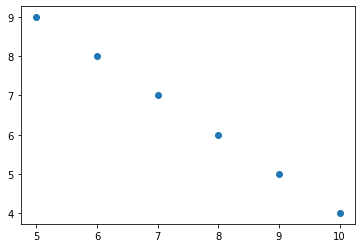

In [52]:
car_prices = [5, 6, 7, 8 ,9, 10]
units_sold = [9, 8, 7, 6, 5, 4]
plt.scatter(car_prices, units_sold)

La grafica muestra que a mayor precio menor numero de veiculos vendidos.



In [53]:
prices_array = np.array(car_prices).reshape(-1, 1)
units_array = np.array(units_sold).reshape(-1, 1)
prices_array

array([[ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

Paso el array a un **array de numpy** para trabajar con tensores.

In [54]:
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
units = torch.from_numpy(units_array).float()
prices, prices.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

Paso el array de numpy a **tensor**.

0.025597430765628815


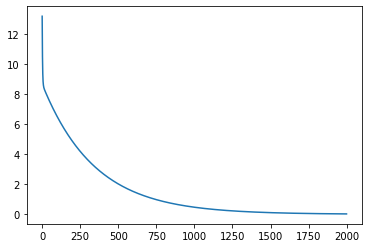

In [55]:
# Regresión lineal de dimensión 1.
model = nn.Linear(1, 1)
# Funcion de perdida: Media del cuadrado de los errores.
loss_function = nn.MSELoss()
# SGD (Stochastic Gradient Descent)
optimize = optim.SGD(model.parameters(), lr=0.015)

# Trainin Loop
losses = []
iterations = 2000
for i in range(iterations):
  prediction = model(prices)
  loss = loss_function(prediction, units)
  losses.append(loss.data)
  optimize.zero_grad()
  loss.backward()
  optimize.step()

# Imprimo la perdida y una gráfica de las perdidas segun la iteración.
print(float(loss))
plt.plot(range(iterations), losses)


In [56]:
example_car_price = torch.Tensor([[5.0]])
sales_prediction = model(example_car_price)
sales_prediction

tensor([[8.7369]], grad_fn=<AddmmBackward>)